# Lab: Neural networks

## Exercise 2

> Add an extra layer to the network. This layer should have 20 nodes.

> To do this re-use your forward and backpropagation function (e.g.: forward(forward(...)...)) (backward(backward(...)...)


Name: Benjamin Fraeyman

#### Imports

In [20]:
import numpy as np
import matplotlib.pylab as plt
from NN_Helper import Gradient_Checker
gradient_checker = Gradient_Checker(limit=1.0*np.exp(-8))

#### Create toy dataset


In [21]:
# Set containing samples with features
X = np.array([  [0.,0.,1.,0.],
                [0.,1.,1.,0.],
                [1.,0.,1.,0.],
                [1.,1.,1.,0.],
                [0.,0.,1.,1.],
                [0.,1.,1.,1.]])

# Ground truth
y = np.array([  [1.,0.,0.],
                [1.,0.,0.],
                [0.,1.,0.],
                [0.,1.,0.],
                [0.,0.,1.],
                [0.,0.,1.]])

n_samples = float(len(X))

#### Initialize weight matrices

> Set the dimensions for the weight matrices.

> Think about what the dimensions of the input data is, how many hidden nodes there have to be and how many classes there are.

In [22]:
# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

# initialize weights randomly with mean 0
# 4nodes naar 20, van 20 naar 3
w1 = 2*np.random.random((4,20)) - 1
w2 = 2*np.random.random((20,3)) - 1


#### Activiation function and the derivative of this function 

In [23]:
# Sigmoid function
def sigmoid(x):
        output = 1/(1+np.exp(-x))
        return output
    
# Derivative of the sigmoid function
def sigmoid_output_to_derivative(output):
        return output*(1-output)

#### Forward propagation



In [24]:
#re-use the forward propagation function you wrote in the previous exercise
def forward(input_layer=None,weights=None):
    p = np.dot(input_layer,weights)
    a = sigmoid(p)
    return a

#### Backpropagation

In [25]:
#re-use the backwardpropagation function you wrote in the previous exercise
def backwards(input_layer=None,weights=None, a=None, dlda=None):
    dadp = sigmoid_output_to_derivative(a)
    dpdw = input_layer.T
    dldw = np.dot(dpdw,dlda*dadp)
    dpdx = weights.T
    dldx = np.dot(dlda*dadp, dpdx)
    return dldw,dldx

#should return:
#Gradient of the loss with respect to the weights
#Gradient of the loss with respect to the input of the layer

#### Loss function

In [26]:
#re-use the loss function you wrote in the previous exercise
def squared_loss(predicted=None,target=None):
    loss = 0.5*np.sum((predicted-target)**2) 
    loss /= n_samples
    return loss

**Derivative of the loss function**

In [27]:
#re-use the function to calculate the derivative of the loss function
def squared_loss_derrivative(predicted=None,target=None):
        dlda = predicted-target
        return dlda

#### Main function

> In the main function the gradient check is also executed. 
> The difference between the analytical gradient and numerical gradient should be smaller than 1.0 e^-8

In [30]:
# A list to store the loss per epoch in. We can plot this later on to see if the network learns something
loss_list=[]

# How many times we will do the combination of forward and backward propagation
n_epoch = 60000

#learning rate
learning_rate = 0.01

for iter in xrange(n_epoch):
    
    #Use the forwards and backwards function to create a TWO layer neural network
    #Again make sure to calculate dldx, which is the gradient of the loss function with respect to the input of the network
    #Calculate the loss and add it to the loss_list
    a1 = forward(input_layer=X,weights=w1)
    a2 = forward(input_layer=a1,weights=w2)
    
    loss_list.append(squared_loss(predicted=a2,target=y))
    
    dldw2, dldx2 = backwards(input_layer= a1,weights=w2, a=a2, dlda = squared_loss_derrivative(predicted=a2,target=y))
    dldw2 /= n_samples
    dldw, dldx = backwards(input_layer= X,weights=w1, a=a1, dlda = dldx2)
    dldw /= n_samples
    
    # Gradient check.
    if iter % 10000 == 0.:
        f = lambda x: squared_loss(target=y,predicted=forward(input_layer=forward(input_layer=X,weights=w1),weights=w2))
        gradient_checker.gradient_check(X,y,dldx,f)

    #Do not forget to update the weights using the gradient descent update rule
    w1 += -learning_rate*dldw
    w2 += -learning_rate*dldw2

Good gradient, difference is: 7.141825896519404e-10
Good gradient, difference is: 1.5302194098809935e-09
Good gradient, difference is: 4.4324552502664743e-10
Good gradient, difference is: 5.348716029286106e-10
Good gradient, difference is: 1.1387767948100313e-09
Good gradient, difference is: 9.38423632859595e-10


In [32]:
print "Output After Training:"
print
print "The output of the network"
print
print a2
print
print "The ground truth:"
print
print y
print
print
print "Apply argmax on the output to get the index per row where the value is maximum"
print
print "Prediction network"
print
print np.argmax(a2,axis=1)
print
print "Ground truth"
print
print np.argmax(y,axis=1)

Output After Training:

The output of the network

[[0.92031222 0.06250365 0.06229378]
 [0.93141899 0.05430874 0.05183625]
 [0.04954046 0.9431526  0.01581519]
 [0.05987846 0.93720495 0.01258012]
 [0.05194591 0.00990782 0.94382371]
 [0.05385695 0.00877013 0.94370757]]

The ground truth:

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


Apply argmax on the output to get the index per row where the value is maximum

Prediction network

[0 0 1 1 2 2]

Ground truth

[0 0 1 1 2 2]


#### Plot the loss

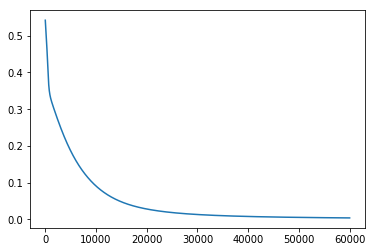

In [33]:
plt.plot(loss_list)
plt.show()